In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [2]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

In [3]:
def methodology(stk1, stk2):
    diff = stk1["Adj Close"] - stk2["Adj Close"]

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [4]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2019-01-01"
    end_date = "2023-01-01"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [5]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [6]:
# Obtain Data
universe = ["AAPL","AMD","AMGN","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM"]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

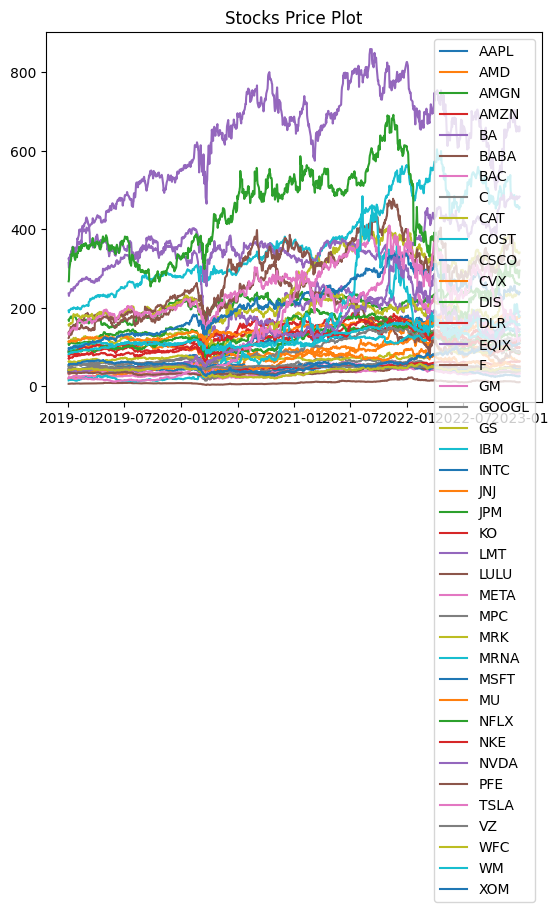

In [7]:
plt.figure()
i = 0
for x in stk_data:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Stocks Price Plot")
plt.savefig('Stock Prices.png', dpi = 1500)
plt.show()

In [8]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAMD
ADF test: p-val= 0.005470280528172666 -> Conclusion: likely stationary
AAPLAMGN
ADF test: p-val= 0.4576146238418594 -> Conclusion: likely has a trend
AAPLAMZN
ADF test: p-val= 0.29316961634472694 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.4342794402618552 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.19161634243622583 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.44154892318247346 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.42126039644736424 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.29748915715081276 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.028197859573600208 -> Conclusion: likely stationary
AAPLCSCO
ADF test: p-val= 0.676410563687902 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.8975491137897845 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.25006574987661123 -> Conclusion: likely has a trend
AAPLDLR
ADF test: p-val= 0.0021849845595946398 -> Concl

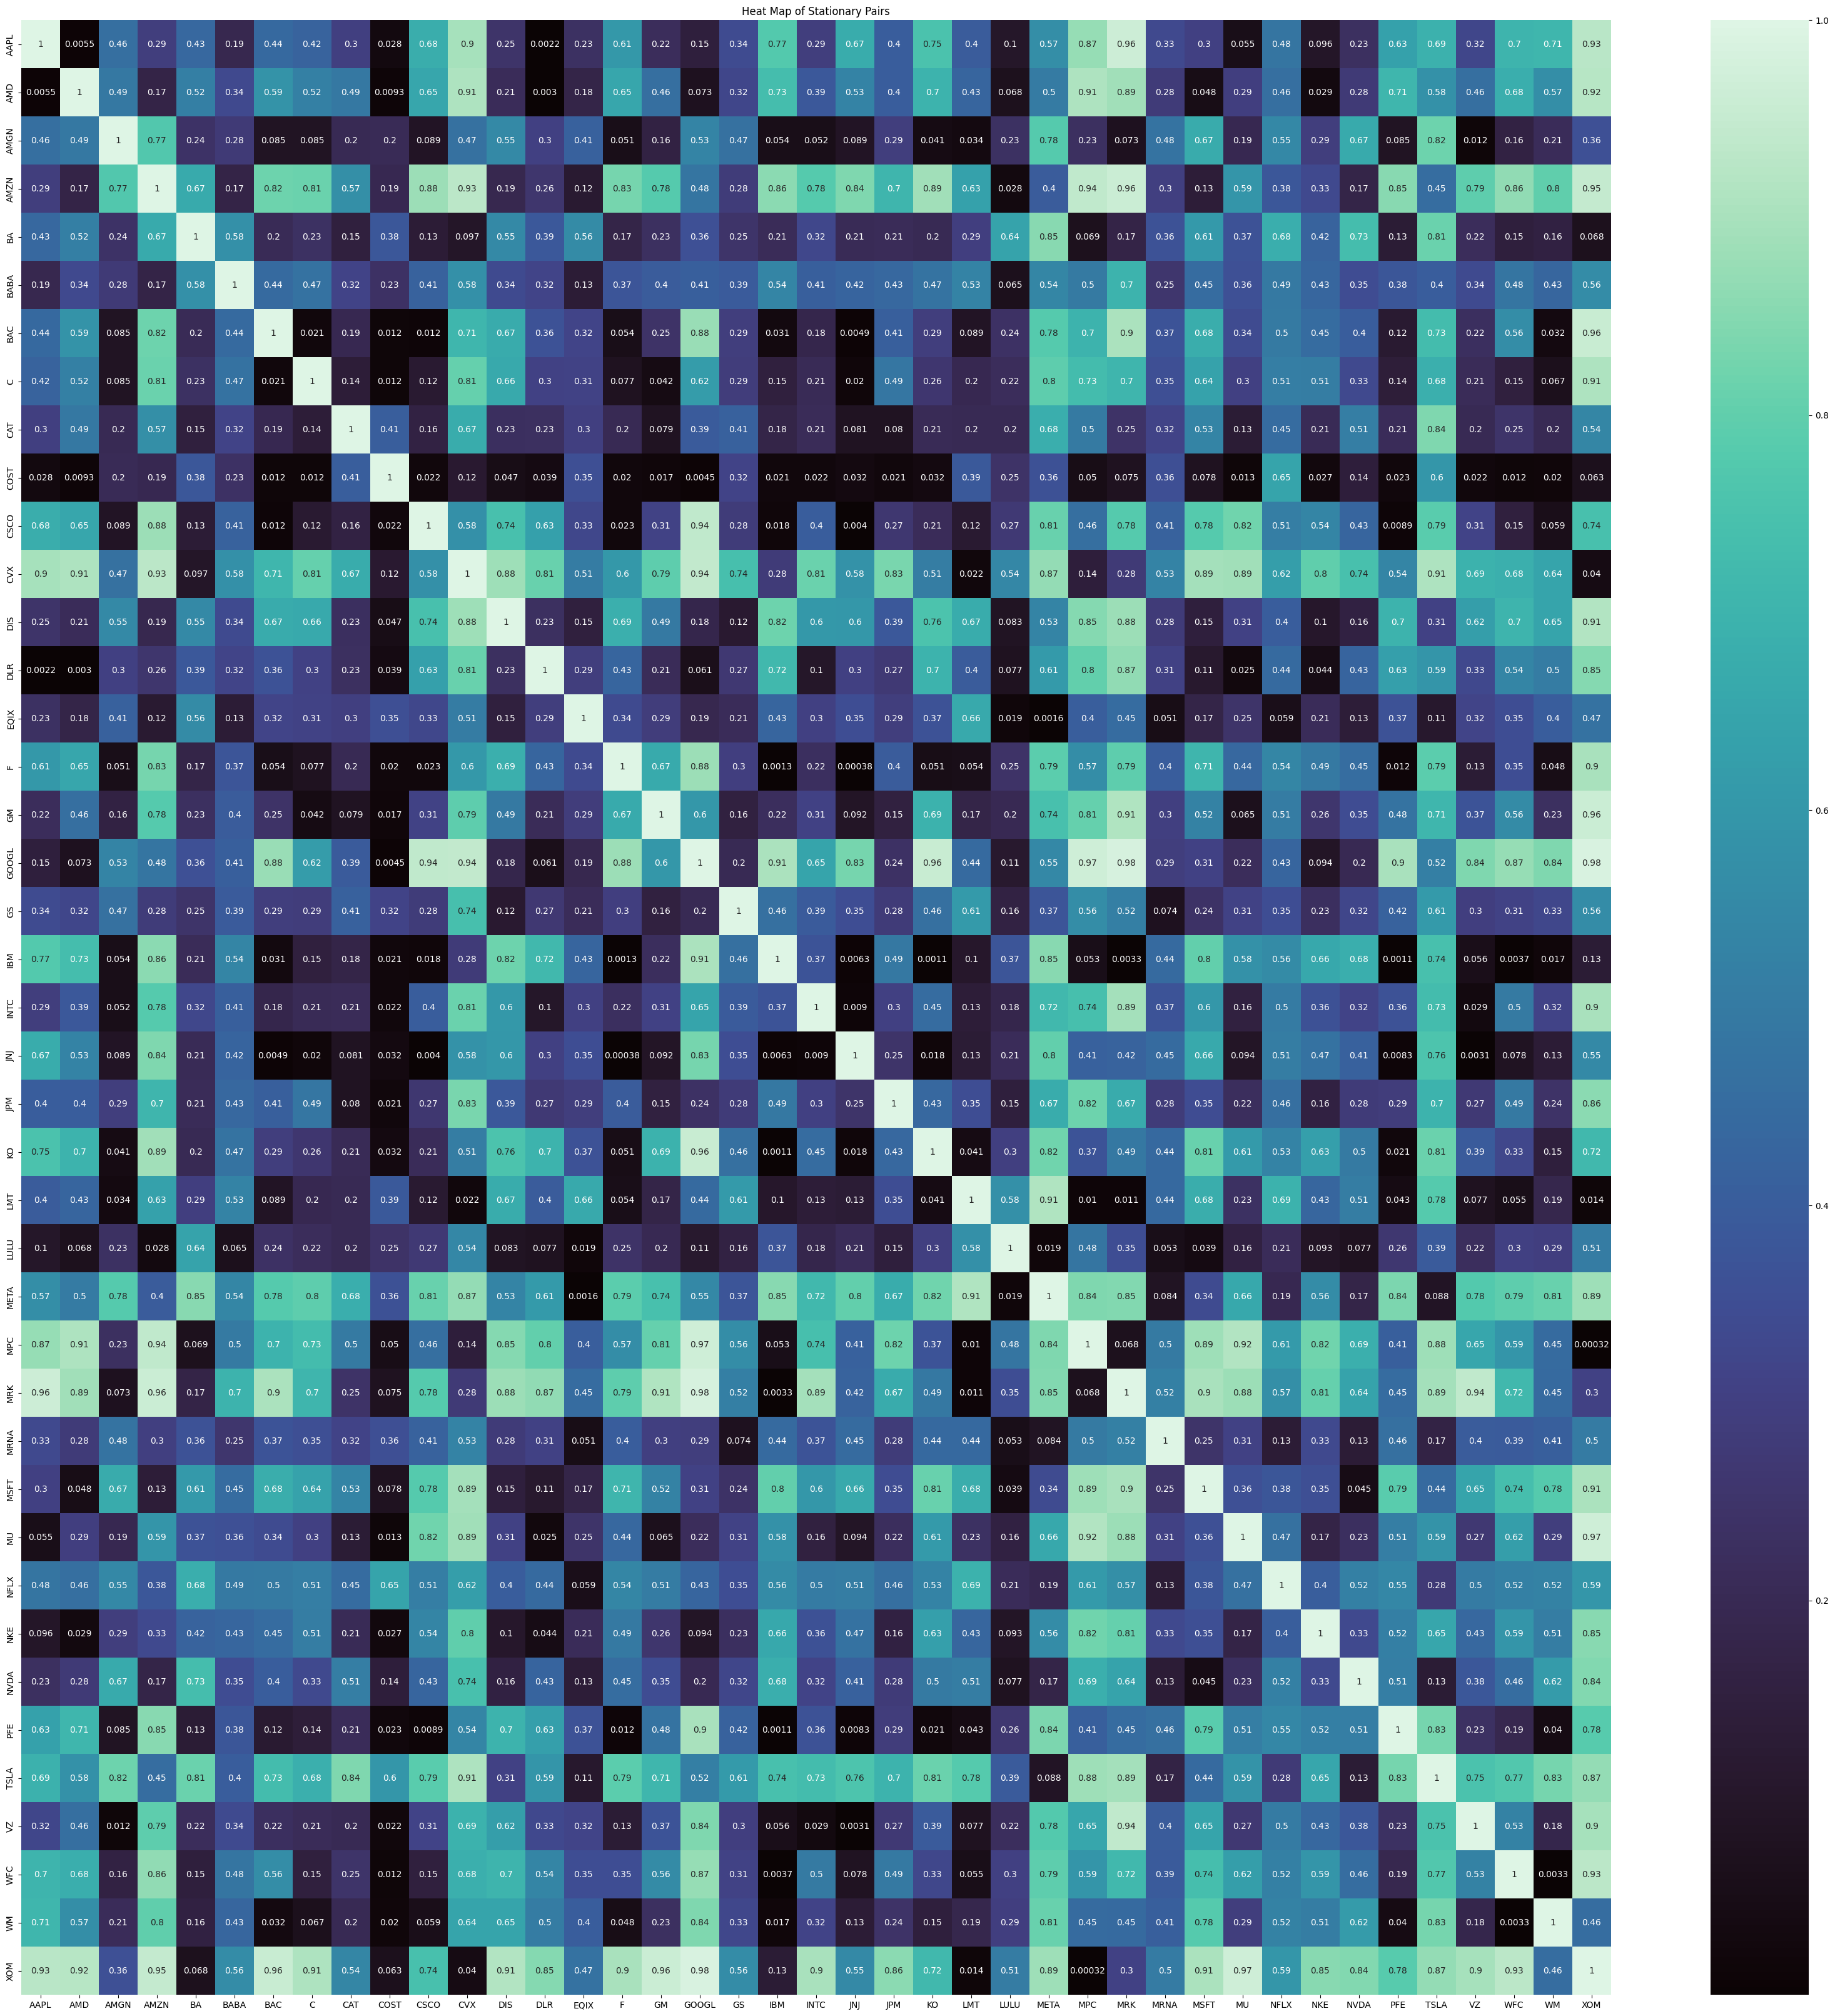

<Figure size 7680x5760 with 0 Axes>

In [9]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum))
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")
plt.figure(dpi=1200)
plt.show()

In [10]:
data

array([[1.        , 0.00547028, 0.45761462, ..., 0.70184657, 0.70820945,
        0.92762748],
       [0.00547028, 1.        , 0.48993429, ..., 0.68321368, 0.56841444,
        0.92284159],
       [0.45761462, 0.48993429, 1.        , ..., 0.16265296, 0.21317466,
        0.35809306],
       ...,
       [0.70184657, 0.68321368, 0.16265296, ..., 1.        , 0.00330792,
        0.93024181],
       [0.70820945, 0.56841444, 0.21317466, ..., 0.00330792, 1.        ,
        0.4570187 ],
       [0.92762748, 0.92284159, 0.35809306, ..., 0.93024181, 0.4570187 ,
        1.        ]])

In [11]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

# Dict comprehension
mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AMD      AMGN      AMZN        BA      BABA       BAC  \
0   1.000000  0.005470  0.457615  0.293170  0.434279  0.191616  0.441549   
1   0.005470  1.000000  0.489934  0.170024  0.518994  0.335757  0.588367   
2   0.457615  0.489934  1.000000  0.773044  0.240088  0.276014  0.085310   
3   0.293170  0.170024  0.773044  1.000000  0.665372  0.170539  0.820065   
4   0.434279  0.518994  0.240088  0.665372  1.000000  0.577225  0.203561   
5   0.191616  0.335757  0.276014  0.170539  0.577225  1.000000  0.444913   
6   0.441549  0.588367  0.085310  0.820065  0.203561  0.444913  1.000000   
7   0.421260  0.522979  0.084931  0.814925  0.233672  0.471879  0.020983   
8   0.297489  0.491283  0.202571  0.571461  0.149998  0.315280  0.192153   
9   0.028198  0.009274  0.203946  0.193619  0.379131  0.234918  0.012123   
10  0.676411  0.654871  0.089278  0.881295  0.132947  0.414938  0.011514   
11  0.897549  0.908370  0.467142  0.931518  0.097002  0.578150  0.710852   
1

In [16]:
print(sol)
print()
n = 40
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0     GOOGL     XOM  0.984566
1     GOOGL     MRK  0.981332
2        MU     XOM  0.968100
3     GOOGL     MPC  0.965191
4      AAPL     MRK  0.963464
..      ...     ...       ...
815       F     IBM  0.001344
816     IBM      KO  0.001116
817     IBM     PFE  0.001058
818       F     JNJ  0.000384
819     MPC     XOM  0.000324

[820 rows x 3 columns]

last 40 rows

    level_0 level_1         0
780    COST       F  0.020009
781    COST      WM  0.019737
782       C     JNJ  0.019620
783    LULU    META  0.019372
784    EQIX    LULU  0.018940
785     JNJ      KO  0.018367
786    CSCO     IBM  0.017565
787    COST      GM  0.017240
788     IBM      WM  0.016602
789     LMT     XOM  0.014128
790    COST      MU  0.012748
791    AMGN      VZ  0.012496
792       C    COST  0.012358
793    COST     WFC  0.012168
794     BAC    COST  0.012123
795       F     PFE  0.011914
796     BAC    CSCO  0.011514
797     LMT     MRK  0.011360
798     LMT     MPC  0.009951
7